# Random Forest 2

Let's train a random forest on the data from 2020-2022 and test it on the data from 2023.

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Data Preparation

In [62]:
# Load the data
df_20 = pd.read_csv('../../results/df_agg_hourly_2020.csv')
df_21 = pd.read_csv('../../results/df_agg_hourly_2021.csv')
df_22 = pd.read_csv('../../results/df_agg_hourly_2022.csv')
df_23 = pd.read_csv('../../results/df_agg_hourly_2023.csv')

# Concatenate the data
df_train = pd.concat([df_20, df_21, df_22])
df_test = df_23

# Make the bezeichnung column as categorical
df_train['bezeichnung'] = df_train['bezeichnung'].astype('category')
df_test['bezeichnung'] = df_test['bezeichnung'].astype('category')

# Extract hour from Time and month from Date
df_train['hour'] = pd.to_datetime(df_train['Time']).dt.hour
df_train['month'] = pd.to_datetime(df_train['Date']).dt.month
df_test['hour'] = pd.to_datetime(df_test['Time']).dt.hour
df_test['month'] = pd.to_datetime(df_test['Date']).dt.month

# Include the day of the week
df_train['day_of_week'] = pd.to_datetime(df_train['Date']).dt.dayofweek
df_test['day_of_week'] = pd.to_datetime(df_test['Date']).dt.dayofweek

# What are the columns?
print(df_train.dtypes)

Standort            int64
Date               object
Time               object
Datetime           object
Hr [%Hr]          float64
RainDur [min]     float64
StrGlo [W/m2]     float64
T [°C]            float64
WD [°]            float64
WVs [m/s]         float64
WVv [m/s]         float64
p [hPa]           float64
Year                int64
AnzBestWir          int64
bezeichnung      category
bike_tot          float64
ped_tot           float64
hour                int32
month               int32
day_of_week         int32
dtype: object


/var/folders/m_/kjymw9sd0yn2wk8yjj853n_c0000gn/T/ipykernel_92479/882771652.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train['hour'] = pd.to_datetime(df_train['Time']).dt.hour
/var/folders/m_/kjymw9sd0yn2wk8yjj853n_c0000gn/T/ipykernel_92479/882771652.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['hour'] = pd.to_datetime(df_test['Time']).dt.hour


In [63]:
# Keep only the relevant columns
df_train_relevant = df_train.drop(['Date', 'Time', 'Datetime', 'WVs [m/s]', 'StrGlo [W/m2]', 'bezeichnung', 'ped_tot'], axis=1)
df_test_relevant = df_test.drop(['Date', 'Time', 'Datetime', 'WVs [m/s]', 'StrGlo [W/m2]', 'bezeichnung', 'ped_tot'], axis=1)

# Print the shapes
print(df_train_relevant.shape)
print(df_test_relevant.shape)

(508575, 13)
(220908, 13)


In [64]:
# Split the dataset into features and target
X_train = df_train_relevant.drop(['bike_tot'], axis=1)
y_train = df_train_relevant['bike_tot']
X_test = df_test_relevant.drop(['bike_tot'], axis=1)
y_test = df_test_relevant['bike_tot']

In [65]:
# Fit the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
RF = model.fit(X_train, y_train)

<Axes: >

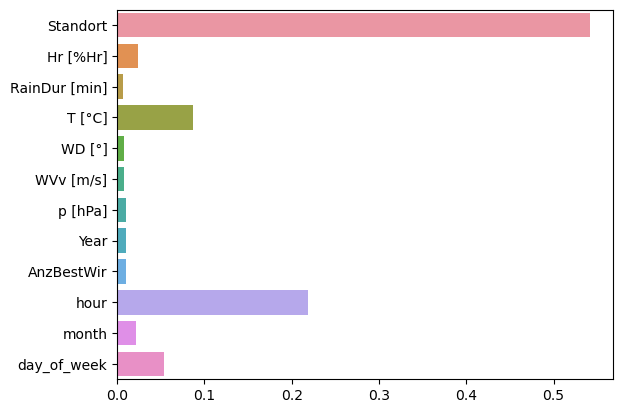

In [66]:
# Plot the importance of the features
importances = RF.feature_importances_
sns.barplot(x=importances, y=X_train.columns)

In [67]:
# Predict on test data
y_pred = RF.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

RMSE: 43.30875466169655
R2: 0.6362665335344111


/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

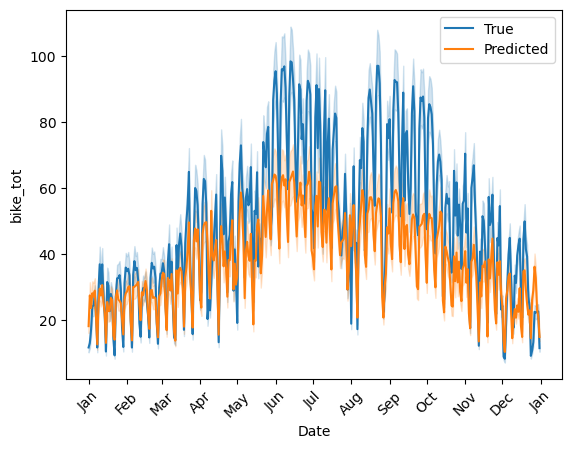

In [68]:
# Plot the predictions and true values
sns.lineplot(x=pd.to_datetime(df_test['Date']), y=y_test, label='True')
sns.lineplot(x=pd.to_datetime(df_test['Date']), y=y_pred, label='Predicted')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=45)
plt.show()

# 2019 Data

In [4]:
# Data import
df_19 = pd.read_csv('../../results/df_agg_hourly_2019.csv')

/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

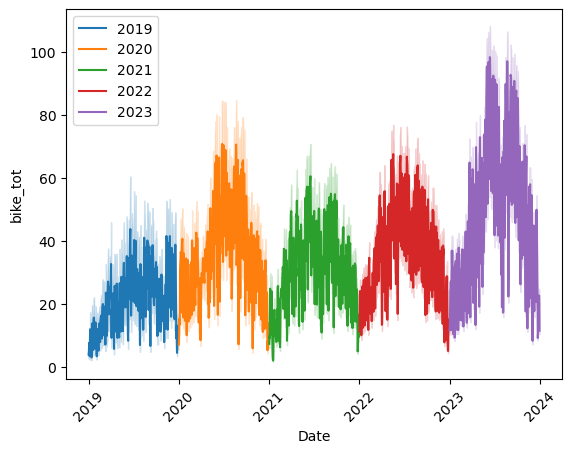

In [9]:
# Let's compare the data from 2019 to 2023
sns.lineplot(x=pd.to_datetime(df_19['Date']), y=df_19['bike_tot'], label='2019')
sns.lineplot(x=pd.to_datetime(df_20['Date']), y=df_20['bike_tot'], label='2020')
sns.lineplot(x=pd.to_datetime(df_21['Date']), y=df_21['bike_tot'], label='2021')
sns.lineplot(x=pd.to_datetime(df_22['Date']), y=df_22['bike_tot'], label='2022')
sns.lineplot(x=pd.to_datetime(df_23['Date']), y=df_23['bike_tot'], label='2023')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.show()

# Random Forest with only one Location

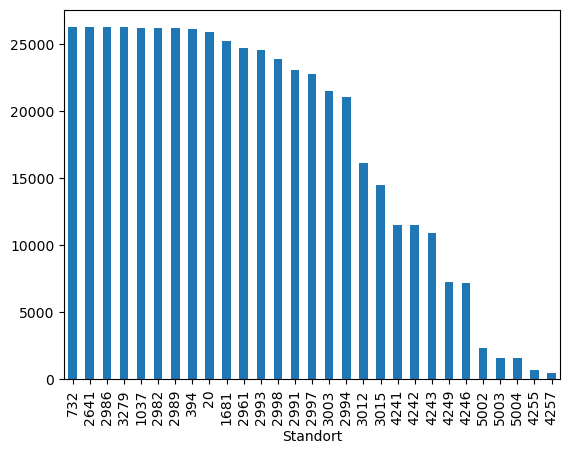

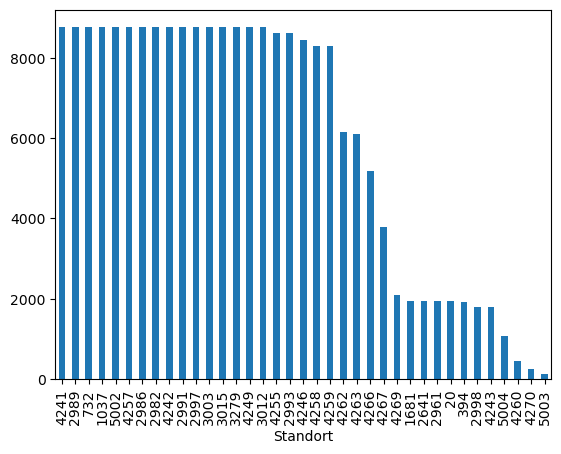

In [16]:
# Let's have a look at the different 'Standort' IDs
df_train_relevant['Standort'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.show()
df_test_relevant['Standort'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.show()

732 seems to be a good one.

In [28]:
# What is the bezeichnung for Standort 732?
df_train[df_train['Standort'] == 732]['bezeichnung'].unique()

['Hardbrücke Nord (Seite Altstetten)']
Categories (28, object): ['Andreasstrasse', 'Baslerstrasse', 'Binzmühlestrasse', 'Bucheggplatz', ..., 'Scheuchzerstrasse', 'Talstrasse', 'Tödistrasse', 'Weinbergfussweg']

In [20]:
# Let's only get the data for Standort 732
df_train_732 = df_train_relevant[df_train_relevant['Standort'] == 732].drop(['Standort'], axis=1)
df_test_732 = df_test_relevant[df_test_relevant['Standort'] == 732].drop(['Standort'], axis=1)

In [21]:
# Let's extract the features and target
X_train_732 = df_train_732.drop(['bike_tot'], axis=1)
y_train_732 = df_train_732['bike_tot']
X_test_732 = df_test_732.drop(['bike_tot'], axis=1)
y_test_732 = df_test_732['bike_tot']

In [22]:
# Let's fit the model
model_732 = RandomForestRegressor(n_estimators=100, random_state=42)
RF_732 = model_732.fit(X_train_732, y_train_732)

hour: 0.6160732712189728
T [°C]: 0.14775208115774163
day_of_week: 0.08716879838959157
month: 0.0363538283194216
Hr [%Hr]: 0.034653893180170356
p [hPa]: 0.01761108706318913
WD [°]: 0.01681132460683672
WVv [m/s]: 0.014936361616718985
RainDur [min]: 0.012566189763143498
Year: 0.008080057949617959
AnzBestWir: 0.007993106734595754


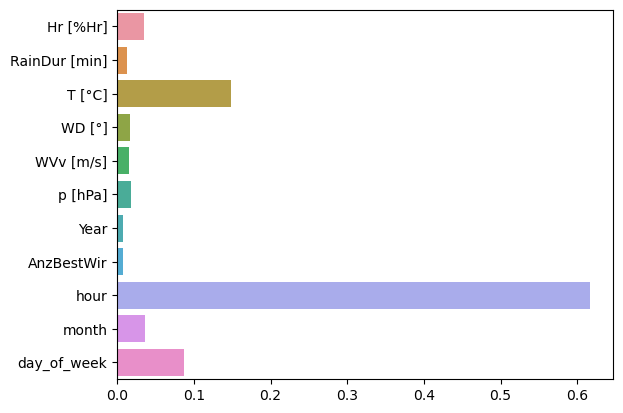

In [47]:
# Plot the importance of the features
importances_732 = RF_732.feature_importances_
sns.barplot(x=importances_732, y=X_train_732.columns)

# Let's rank the importances
indices = np.argsort(importances_732)[::-1]
for f in range(X_train_732.shape[1]):
    print(f'{X_train_732.columns[indices[f]]}: {importances_732[indices[f]]}')

In [24]:
# Predictions for 2023
y_pred_732 = RF_732.predict(X_test_732)

# Evaluate the model
rmse_732 = np.sqrt(mean_squared_error(y_test_732, y_pred_732))
r2_732 = r2_score(y_test_732, y_pred_732)
print(f'RMSE: {rmse_732}')
print(f'R2: {r2_732}')

RMSE: 16.622602463938264
R2: 0.8749549277455868


/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

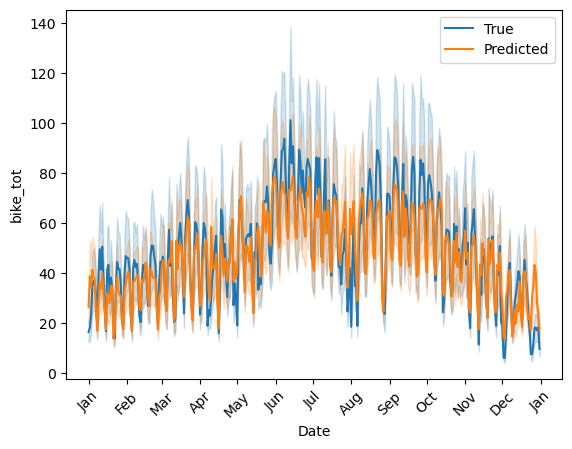

In [26]:
# Get the Dates for Standort 732 from original data
dates_train_732 = df_train[df_train['Standort'] == 732]['Date']
dates_test_732 = df_test[df_test['Standort'] == 732]['Date']

# Plot the predictions and true values
sns.lineplot(x=pd.to_datetime(dates_test_732), y=y_test_732, label='True')
sns.lineplot(x=pd.to_datetime(dates_test_732), y=y_pred_732, label='Predicted')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=45)
plt.show()

In [42]:
# Let's do a grid search to find the best hyperparameters
param_grid = {'n_estimators': [ 100, 500, 1000, 2000]}
grid_search = GridSearchCV(estimator=model_732, param_grid=param_grid, cv=5, n_jobs=-1)
GS_fits = grid_search.fit(X_train_732, y_train_732)

/Users/damian/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [43]:
# What is the best hyperparameter?
GS_fits.best_params_

{'n_estimators': 2000}

In [44]:
# Extract the best model
RF_732_best = GS_fits.best_estimator_

In [45]:
# Predictions for 2023
y_pred_732_best = RF_732_best.predict(X_test_732)

# Evaluate the model
rmse_732_best = np.sqrt(mean_squared_error(y_test_732, y_pred_732_best))
r2_732_best = r2_score(y_test_732, y_pred_732_best)
print(f'RMSE: {rmse_732_best}')
print(f'R2: {r2_732_best}')

RMSE: 16.503208783739076
R2: 0.8767447767995002


/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

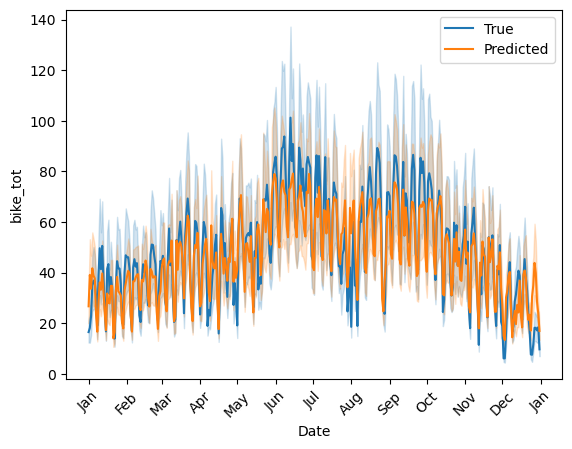

In [46]:
# Plot the predictions and true values
sns.lineplot(x=pd.to_datetime(dates_test_732), y=y_test_732, label='True')
sns.lineplot(x=pd.to_datetime(dates_test_732), y=y_pred_732_best, label='Predicted')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=45)
plt.show()

## Only Features with high Importance

In [51]:
# Take the 5 features with highest importance
X_train_732_imp = X_train_732[['hour', 'T [°C]', 'day_of_week', 'month', 'Hr [%Hr]']]
X_test_732_imp = X_test_732[['hour', 'T [°C]', 'day_of_week', 'month', 'Hr [%Hr]']]

In [49]:
# Fit the model
RF_732_imp = model_732.fit(X_train_732_imp, y_train_732)

<Axes: >

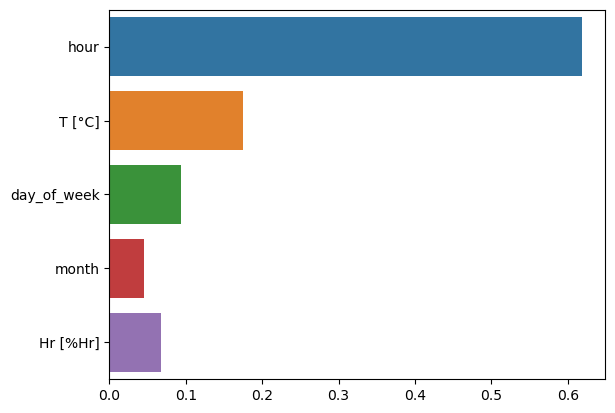

In [50]:
# Plot the importance of the features
importances_732_imp = RF_732_imp.feature_importances_
sns.barplot(x=importances_732_imp, y=X_train_732_imp.columns)

In [52]:
# Predictions for 2023
y_pred_732_imp = RF_732_imp.predict(X_test_732_imp)

# Evaluate the model
rmse_732_imp = np.sqrt(mean_squared_error(y_test_732, y_pred_732_imp))
r2_732_imp = r2_score(y_test_732, y_pred_732_imp)
print(f'RMSE: {rmse_732_imp}')
print(f'R2: {r2_732_imp}')

RMSE: 18.021761048971722
R2: 0.8530183905459662


/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

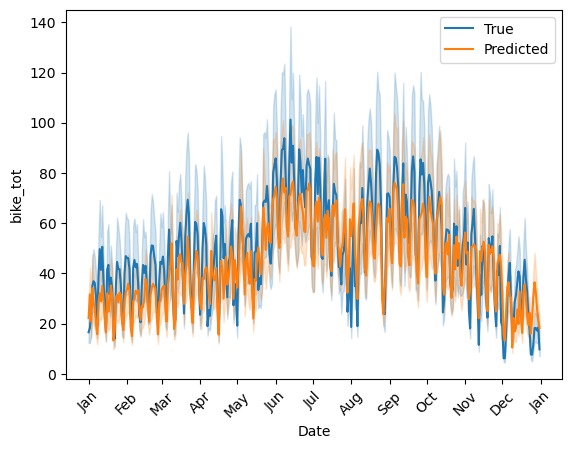

In [53]:
# Plot the predictions and true values
sns.lineplot(x=pd.to_datetime(dates_test_732), y=y_test_732, label='True')
sns.lineplot(x=pd.to_datetime(dates_test_732), y=y_pred_732_imp, label='Predicted')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=45)
plt.show()

# Results

In [71]:
# Let's compare the R2 and RMSE for the different models for Standort 732
df_results = pd.DataFrame({'Model': ['All Features', 'Best Hyperparameters', 'Top 5 Features'],
                            'RMSE': [rmse_732, rmse_732_best, rmse_732_imp],
                            'R2': [r2_732, r2_732_best, r2_732_imp]})

# round the values
df_results_rounded = df_results.round(2)
print(df_results_rounded)

# Save the results
df_results.to_csv('RF_results_732.csv', index=False)
df_results_rounded.to_csv('RF_results_732_rounded.csv', index=False)

                  Model   RMSE    R2
0          All Features  16.62  0.87
1  Best Hyperparameters  16.50  0.88
2        Top 5 Features  18.02  0.85


In [72]:
# Let's get all the results (also from the random forest model with all locations)
df_results_all = pd.DataFrame({'Model': ['All Locations', 'All Features', 'Best Hyperparameters', 'Top 5 Features'],
                            'RMSE': [rmse, rmse_732, rmse_732_best, rmse_732_imp],
                            'R2': [r2, r2_732, r2_732_best, r2_732_imp]})

# round the values
df_results_all_rounded = df_results_all.round(2)
print(df_results_all_rounded)

# Save the results
df_results_all.to_csv('RF_results_all.csv', index=False)
df_results_all_rounded.to_csv('RF_results_all_rounded.csv', index=False)

                  Model   RMSE    R2
0         All Locations  43.31  0.64
1          All Features  16.62  0.87
2  Best Hyperparameters  16.50  0.88
3        Top 5 Features  18.02  0.85


In [60]:
X_train_732.columns

Index(['Hr [%Hr]', 'RainDur [min]', 'T [°C]', 'WD [°]', 'WVv [m/s]', 'p [hPa]',
       'Year', 'AnzBestWir', 'hour', 'month', 'day_of_week'],
      dtype='object')